<a href="https://colab.research.google.com/github/shafkat2/Industrial_Development_A.I/blob/master/Exploratory_Data_analysis_Accelo_Gyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Loading Drives and Importing Libraries***

In [26]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
!pip install xlrd
from scipy import signal
import random
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
import math
import time as time
import seaborn as sns
from scipy.signal import medfilt
from scipy.signal import savgol_filter
from keras.models import model_from_json
import pywt
from statsmodels.robust import mad
from scipy.signal import sosfiltfilt, butter
#from pandas.tools.plotting import table
import matplotlib.dates as md
import scipy.stats as st

# ***Functions ***

In [0]:
# removing nan columns and arbitary columns from data which contained NaN
def initial_prep(data):
  
  data = data.drop([0], axis=0)
  data = data.reset_index()
  data = data.drop(columns=['Unnamed: 8',	'Generation.1','Timestamp.1','Speed'])
  
  return data
  
#using brute force to check which distribution the data falls under  
def get_best_distribution(data):
    value_list = []
    dist_names = ["norm", "exponweib", "weibull_max", "pareto", "genextreme","lognorm","tukeylambda","vonmises_line","dgamma","exponnorm","chi","chi2","burr12","burr","erlang","alpha","anglit","arcsine","beta","betaprime","bradford","cauchy","cosine","crystalball","dweibull","exponweib","exponpow","f","fatiguelife","fisk","foldcauchy","foldnorm","frechet_r","frechet_l","genlogistic","gennorm","genpareto","genexpon","genextreme","gausshyper","gamma","gengamma","genhalflogistic","gilbrat",
                 "gompertz","gumbel_r","gumbel_l","halfcauchy","halflogistic","halfnorm","halfgennorm","hypsecant","invgamma","invgauss","invweibull","johnsonsb","johnsonsu","kappa4","kappa3","ksone",'kstwobign',"laplace","levy","logistic","loggamma","loglaplace","lognorm","lomax","maxwell","mielke","moyal","nakagami","ncx2","ncf","nct",'norm',"norminvgauss","pareto","pearson3","powerlaw","powerlognorm","powernorm","rdist","reciprocal","rayleigh","rice","recipinvgauss","semicircular","skewnorm","t","trapz","truncexpon","uniform","vonmises_line",
                  "triang","wald","wrapcauchy"]
                  
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    value_list.append(best_dist)
    print("Best p value: "+ str(best_p))
    value_list.append(best_p)
    print("Parameters for the best fit: "+ str(params[best_dist]))
    value_list.append(params[best_dist])
    
    
    return value_list

# ***Preprocessing***

In [0]:
GyroLinear_acceleration = pd.read_csv('/content/drive/My Drive/Research_NSU/Raw_Data/GyroLinearAcceleration-2019-1-6-6-44-54_ok.csv')

In [0]:
data = initial_prep(GyroLinear_acceleration)

In [0]:
data.head(3)

,index,Generation,Timestamp,AX,AY,AZ,lAX,lAY,lAZ
0,1,6603.0,6:44:18,0.098165,4.678413,8.269825,-4.835621,-4.134902,10.325537
1,2,6604.0,6:44:18,-0.196331,4.546728,8.913885,-4.835621,-4.134902,10.325537
2,3,6605.0,6:44:18,-0.201119,4.635316,9.016839,-4.835621,-4.134902,10.325537


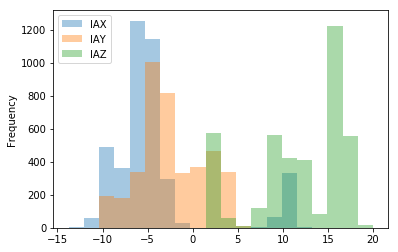

In [34]:
data[["AX", "AY","AZ"]].plot.hist(bins=20,alpha=0.4) 

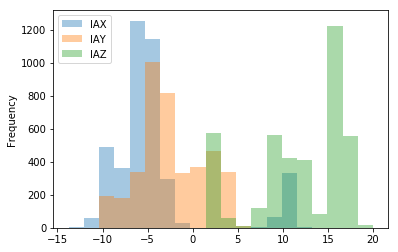

In [37]:
data[["lAX", "lAY","lAZ"]].plot.hist(bins=20,alpha=0.4) 

In [41]:
result  = get_best_distribution(data["AZ"])

p value for norm = 5.1057781186365065e-21
p value for exponweib = 7.005617123086598e-20
p value for weibull_max = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 1.689665946011058e-89
p value for lognorm = 8.015356958217261e-22


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1682: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:6470: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


p value for tukeylambda = 0.2184672698268012
p value for vonmises_line = 2.9290005793062486e-19
p value for dgamma = 0.02046061245340974
p value for exponnorm = 2.885553770434365e-22
p value for chi = 1.784748905659758e-24
p value for chi2 = 2.876384596164551e-23


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1059: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


p value for burr12 = 8.973013133191188e-06
p value for burr = 0.0001939433496576469


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 30.450000000000003.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.549999999999997.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 26.099999999999994.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.066666666666663.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2688: RuntimeWarning: The shape parameter of the erlang distributio

p value for erlang = 9.174020043700444e-30
p value for alpha = 1.1352298581318523e-33
p value for anglit = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:390: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p value for arcsine = 0.0
p value for beta = 5.635690918484945e-19


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),


p value for betaprime = 1.0427491316910977e-110
p value for bradford = 0.0
p value for cauchy = 3.6844399103724697e-10
p value for cosine = 0.0
p value for crystalball = 5.105696471422939e-21
p value for dweibull = 0.03580642665974851
p value for exponweib = 7.005617123086598e-20
p value for exponpow = 7.021320632928827e-227
p value for f = 3.9043979362829e-21
p value for fatiguelife = 3.5164220164999425e-21
p value for fisk = 9.2703819079092e-05
p value for foldcauchy = 1.2901638769688213e-11
p value for foldnorm = 5.126023588511448e-21
p value for frechet_r = 2.8414466431836884e-59


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `frechet_r` is deprecated!
The distribution `frechet_r` is a synonym for `weibull_min`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_min`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `frechet_l` is deprecated!
The distribution `frechet_l` is a synonym for `weibull_max`; this historical
usage is deprecated because of possible confusion with the (quite different)
Frechet distribution.  To preserve the existing behavior of the program, use
`scipy.stats.weibull_max`.  For the Frechet distribution (i.e. the Type II
extreme value distribution), use `scipy.stats.invweibull`.


p value for frechet_l = 0.0
p value for genlogistic = 0.00020225618648852617
p value for gennorm = 0.030133607155551155


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:2282: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


p value for genpareto = 0.0
p value for genexpon = 0.0
p value for genextreme = 1.689665946011058e-89


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:3214: RuntimeWarning: invalid value encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:3214: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


p value for gausshyper = 0.0
p value for gamma = 7.014806232284937e-26
p value for gengamma = 8.58791024642094e-19
p value for genhalflogistic = 0.0
p value for gilbrat = 0.0
p value for gompertz = 9.293062192452321e-107
p value for gumbel_r = 3.059148442935776e-211
p value for gumbel_l = 1.852840467541265e-106
p value for halfcauchy = 0.0
p value for halflogistic = 0.0
p value for halfnorm = 0.0
p value for halfgennorm = 0.0
p value for hypsecant = 0.03372940442845752
p value for invgamma = 2.2212218657061686e-25
p value for invgauss = 4.590359450702079e-59
p value for invweibull = 1.3029019022931839e-210
p value for johnsonsb = 1.213992403860904e-19
p value for johnsonsu = 0.8071593649030564
p value for kappa4 = 0.0
p value for kappa3 = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:82: RuntimeWarning: floating point number truncated to an integer
  return scu._smirnovc(n, x)


p value for ksone = 0.0
p value for kstwobign = 0.0
p value for laplace = 0.028304209715193436
p value for levy = 0.0
p value for logistic = 9.335616476063721e-05
p value for loggamma = 3.3983018754865126e-19
p value for loglaplace = 0.0027669482655877757


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4339: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


p value for lognorm = 8.015356958217261e-22
p value for lomax = 0.0
p value for maxwell = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1675: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1675: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


p value for mielke = 0.0001710541707511047
p value for moyal = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5062: RuntimeWarning: overflow encountered in double_scalars
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


p value for nakagami = 4.263633654569104e-23
p value for ncx2 = 2.1731067810368827e-28


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1682: RuntimeWarning: invalid value encountered in log
  return log(self._pdf(x, *args))


p value for ncf = 1.8002518563299949e-69


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5335: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5337: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))


p value for nct = 2.570055378637338e-29
p value for norm = 5.1057781186365065e-21
p value for norminvgauss = 1.4116041146632134e-22
p value for pareto = 0.0
p value for pearson3 = 0.0
p value for powerlaw = 0.0


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5737: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5737: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


p value for powerlognorm = 3.030560715718245e-18
p value for powernorm = 2.2092125023233862e-18
p value for rdist = 5.470314048549738e-21
p value for reciprocal = 0.0
p value for rayleigh = 0.0
p value for rice = 5.1483725693157814e-21


/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:6056: RuntimeWarning: overflow encountered in exp
  return 1.0-_norm_cdf(isqx*trm1)-np.exp(2.0/mu)*_norm_cdf(-isqx*trm2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:6056: RuntimeWarning: invalid value encountered in multiply
  return 1.0-_norm_cdf(isqx*trm1)-np.exp(2.0/mu)*_norm_cdf(-isqx*trm2)


p value for recipinvgauss = nan
p value for semicircular = 0.0
p value for skewnorm = 2.4090326202624604e-21
p value for t = 0.2204113940468359
p value for trapz = 0.0
p value for truncexpon = 0.0
p value for uniform = 0.0
p value for vonmises_line = 2.9290005793062486e-19
p value for triang = 0.0
p value for wald = 0.0
p value for wrapcauchy = nan
Best fitting distribution: johnsonsu
Best p value: 0.8071593649030564
Parameters for the best fit: (0.10746222153966889, 1.2047020851369536, 9.77973376675745, 0.43425341765585795)


/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
